In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cv2show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    
    

In [3]:
# 对图片进行垂直分割，传入的是二值图
def verticalCut(img,org_img):
    (x,y)=img.shape #返回的分别是矩阵的行数和列数，x是行数，y是列数
    print((x,y))
    pointCount=np.zeros(y,dtype=np.uint8)#每列黑色的个数
    x_axes=np.arange(0,y)
    #i是列数，j是行数
    tempimg=img.copy()
    for i in range(0,y):
        for j in range(0,x):
            if(tempimg[j,i] == 0):
                pointCount[i]=pointCount[i]+1
    plt.plot(x_axes,pointCount)
    start = []
    end = []
    # 对照片进行分割
    print(pointCount)
    for index in range(1, y-1):
        if ((pointCount[index-1] == x) & (pointCount[index] < x)):
            start.append(index)
        elif ((pointCount[index] < x) & (pointCount[index +1] == x)):
            end.append(index)
    print('start:',start)
    print('end:',end)
    imgArr=[]
    
    # 对原始图像进行模糊与切分
    img_blur = cv2.GaussianBlur(org_img,(3,3),0,0,cv2.BORDER_DEFAULT)
    img_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)
    ret, img_thresh = cv2.threshold(img_gray, 0, 255, + cv2.THRESH_OTSU)
    
    for idx in range(0,len(start)):
        tmp = img_thresh[:,start[idx]:end[idx]]
        tmp.astype(int)
        cv2show('a',tmp)
        imgArr.append(tmp)

    return imgArr

In [4]:
# 将方形图片按比例放大到对应的大小
def reshape(img,tar_size):
    match = cv2.imread(img)
    match = cv2.cvtColor(match,cv2.COLOR_BGR2GRAY)
    cv2show('a',match)
    print(match.shape)
    shape = match.shape
    cha = max(shape[0],shape[1]) / tar_size
    print('cha',cha)
    match_res = cv2.resize(match,(int(shape[1]/cha),int(shape[0]/cha)),interpolation=cv2.INTER_CUBIC)
    print(match_res.shape)
    return match_res

In [5]:
img_path = './aaaa.png'
img = cv2.imread(img_path)
img_blur = cv2.GaussianBlur(img,(7,7),0,0,cv2.BORDER_DEFAULT)
img_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img_gray, 0, 255, + cv2.THRESH_OTSU)
img_medi = cv2.medianBlur(img_thresh, 3)

In [6]:
cv2show('org',img)
cv2show('blur',img_blur)
cv2show('gray',img_gray)
cv2show('thresh',img_thresh)
cv2show('medi',img_medi)

(34, 134)
[34 34 34 31 11 10 12 15 16 14 12 13 15 14 10  8 10 17 34 34 15 11  9  7
  5 12 14 14 14 14 12  4  4  8 10 17 34 34 34 34 34 34 34 34 34 27 13 10
  8  6  6 18 20 18 16 13  8  9 10 13 18 30 34 34 24 20 16 13 10 12 13 13
 14 14 11 14 21 23 26 34 34 34 34 30 28 28 28 27 17 12  7  6 12 17 21 24
 27 34 34 34 30 17 13 10 11 13 16 18 18 17 15 13 15 19 26 34 34 34 34 34
 34 34 34 22 10  9  9 16 34 34 34 34 34 34]
start: [3, 20, 45, 64, 83, 100, 123]
end: [17, 35, 61, 78, 96, 114, 127]


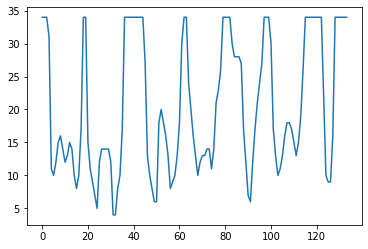

In [7]:
word_piece = verticalCut(img_medi,img)

In [ ]:
idx = 0

windows = []

while  (idx < len(word_piece)):
    print(word_piece[idx].shape)
    shape = word_piece[idx].shape
    windows_size = max(shape[0],shape[1]) + 5
    window = np.zeros((windows_size,windows_size),dtype = np.uint8)
    
    x = windows_size//2 - shape[0]//2
    y = windows_size//2 - shape[1]//2

    window[x:x+shape[0],y:y+shape[1]] = word_piece[idx]
    windows.append(window)
    
    idx = idx + 1

for idx in range (0,len(windows)):
    cv2show('aaaaa',windows[idx])
    #result = cv2.matchTemplate(window)


cmp = reshape('./refer/川.jpg',windows[0].shape[0]-5)
cmp1 = reshape('./refer/0.jpg',windows[0].shape[0]-5)

cv2show('cmp',cmp)
cv2show('cmp1',cmp1)

result=cv2.matchTemplate(windows[0],cmp1,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print('max_val')
print(max_val)

tw,th=cmp.shape[:2]
tl=(max_loc[0]+th+2,max_loc[1]+tw+2)
cv2.rectangle(windows[0],max_loc,tl,[255,0,0])
cv2show('aaaaaaa',windows[0])

result=cv2.matchTemplate(windows[0],cmp,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print('max_val')
print(max_val)

tw,th=cmp.shape[:2]
tl=(max_loc[0]+th+2,max_loc[1]+tw+2)
cv2.rectangle(windows[0],max_loc,tl,[255,0,0])
cv2show('aaaaaaa1',windows[0])

'''
tw,th=cmp.shape[:2]
tl=(max_loc[0]+th+2,max_loc[1]+tw+2)
cv2.rectangle(windows[0],max_loc,tl,[0,0,0])
cv2show('aaaaaaa',windows[0])
'''


    

(34, 14)
(34, 15)
(34, 16)
(34, 14)
(34, 13)
(34, 14)
(34, 4)
(20, 20)
cha 0.5882352941176471
(34, 34)
(20, 20)
cha 0.5882352941176471
(34, 34)
max_val
0.28423237800598145
max_val
-0.031107734888792038


In [ ]:
import numpy as np
import cv2

compare_size = 30
windows_size = 25

#输入的分别是原图模板和标签
def matchTemplate(src,matchSrc,label):
    binaryc=imgThreshold(src)
    #返回的是一个矩阵，里面的值为每一个匹配的结果
    result=cv2.matchTemplate(binaryc,matchSrc,cv2.TM_CCOEFF_NORMED)
    #返回最小值、最大值、最小值的位置、最大值的位置
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
 
    tw,th=matchSrc.shape[:2]
    tl=(max_loc[0]+th+2,max_loc[1]+tw+2)
    cv2.rectangle(src,max_loc,tl,[0,0,0])
    cv2.putText(src,label,max_loc,fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=0.6,color=(240,230,0))
    cv2.imshow('001',src)
    
match = cv2.imread('./refer/0.jpg')
cv2.imshow('a',match)
print(match.shape)
shape = match.shape
cha = max(shape[0],shape[1]) / compare_size
print('cha',cha)
match_res = cv2.resize(match,(int(shape[1]/cha),int(shape[0]/cha)),interpolation=cv2.INTER_CUBIC)
print(match_res.shape)

cv2.waitKey(0)



In [1]:
template = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
            'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T','U', 'V', 'W', 'X', 'Y', 'Z',
            '藏', '川', '鄂', '甘', '赣', '贵', '桂', '黑', '沪', '吉', '冀', '津', '晋', '京', '辽', '鲁', '蒙', '闽','宁','青', '琼', '陕', '苏', '皖', '湘', '新', '渝', '豫', '粤', '云', '浙']

for i in range(0,34):
    word = './refer/'+template[i]+'.jpg'
    print(word)

./refer/0
./refer/1
./refer/2
./refer/3
./refer/4
./refer/5
./refer/6
./refer/7
./refer/8
./refer/9
./refer/A
./refer/B
./refer/C
./refer/D
./refer/E
./refer/F
./refer/G
./refer/H
./refer/J
./refer/K
./refer/L
./refer/M
./refer/N
./refer/P
./refer/Q
./refer/R
./refer/S
./refer/T
./refer/U
./refer/V
./refer/W
./refer/X
./refer/Y
./refer/Z
